# Overview

`-` AirQuality 데이터를 대상으로 모델링을 수행 후 오존 농도를 예측해보자

## import

In [97]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

## 데이터 이해

### 기본 정보 확인

`-` 데이터의 정보 및 EDA 수행

In [98]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

In [99]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


`-` 기술통계 확인

In [101]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


`-` 상관관계 확인

In [102]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


<Axes: >

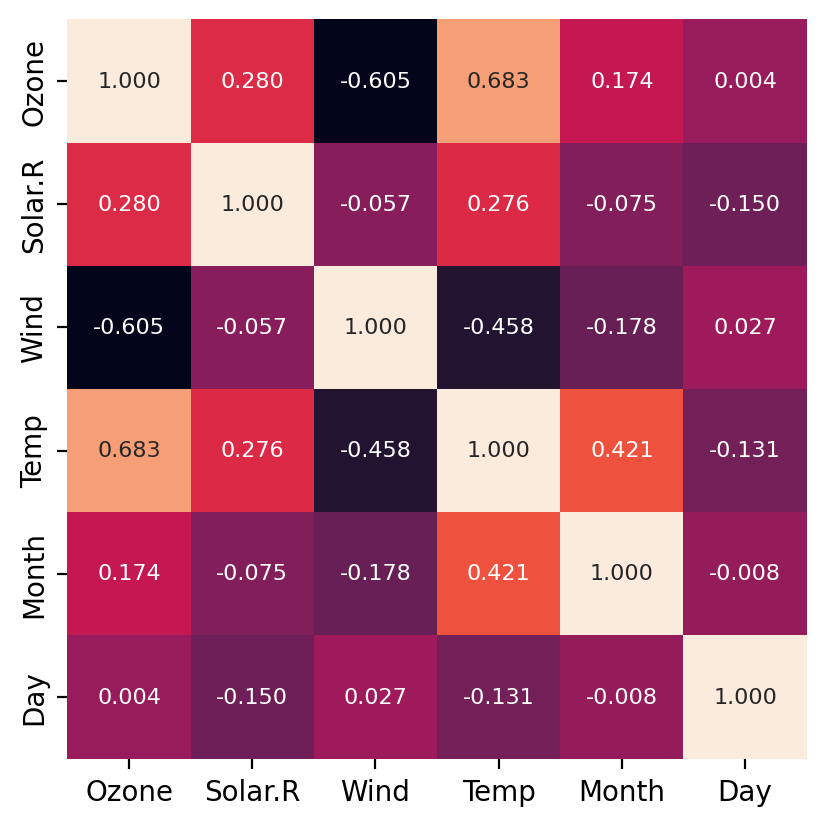

In [103]:
sns.heatmap(data.corr(),
                   fmt = ".3f",
                    annot = True,
                   square =True,
                    cbar = False,
                   annot_kws = {"size"  : 8})

`-` temp  $\to$ ozone의 관계

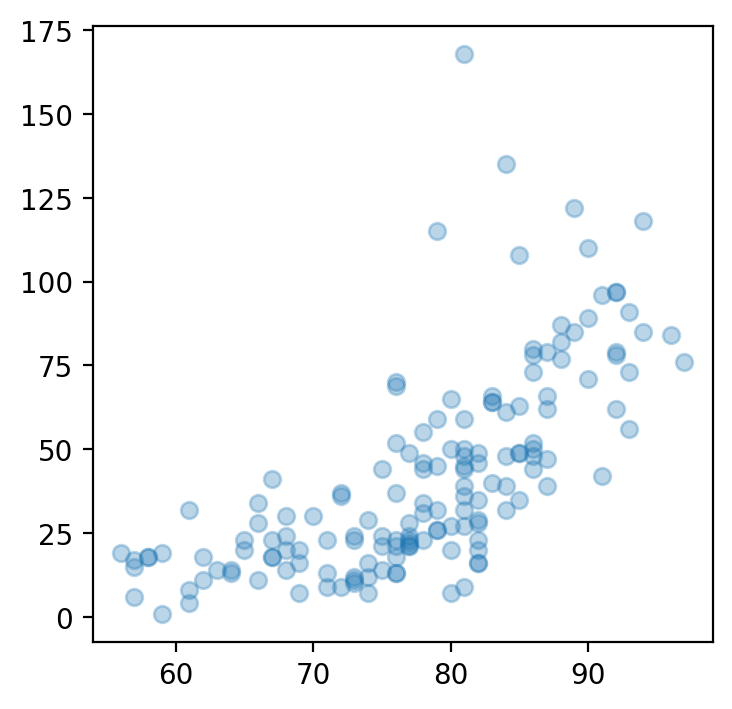

In [104]:
plt.figure(figsize=(4,4))
plt.scatter(data.Temp, data.Ozone,alpha=0.3)

## 데이터 준비

### 결측치 확인 후 채우기

In [105]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [106]:
data.fillna(method= "ffill",inplace=True)

In [107]:
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 변수제거

In [108]:
d_cols = data.columns.drop(["Month", "Day"])

_data = data[d_cols].copy()

In [109]:
_data

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56
...,...,...,...,...
148,30,193.0,6.9,70
149,23,145.0,13.2,77
150,14,191.0,14.3,75
151,18,131.0,8.0,76


### data split

In [110]:
x = _data.iloc[:,1:]
y = _data["Ozone"]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=7)
x_train.head()

,Solar.R,Wind,Temp
62,248.0,9.2,85
51,150.0,6.3,77
141,238.0,10.3,68
118,153.0,5.7,88
74,291.0,14.9,91


## 모델링

### step 1. 모듈 불러오기

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

### step 2. 사용할 모델 선언

In [112]:
model = LinearRegression()

### step 3. 학습하기

In [113]:
model.fit(x_train, y_train)

LinearRegression()

### step 4. 예측하기

In [143]:
y_pred = model.predict(x_test)

### step 5. 평가하기

In [124]:
mean_absolute_error(y_pred,y_test)

12.930971421482479

`-` 시각화

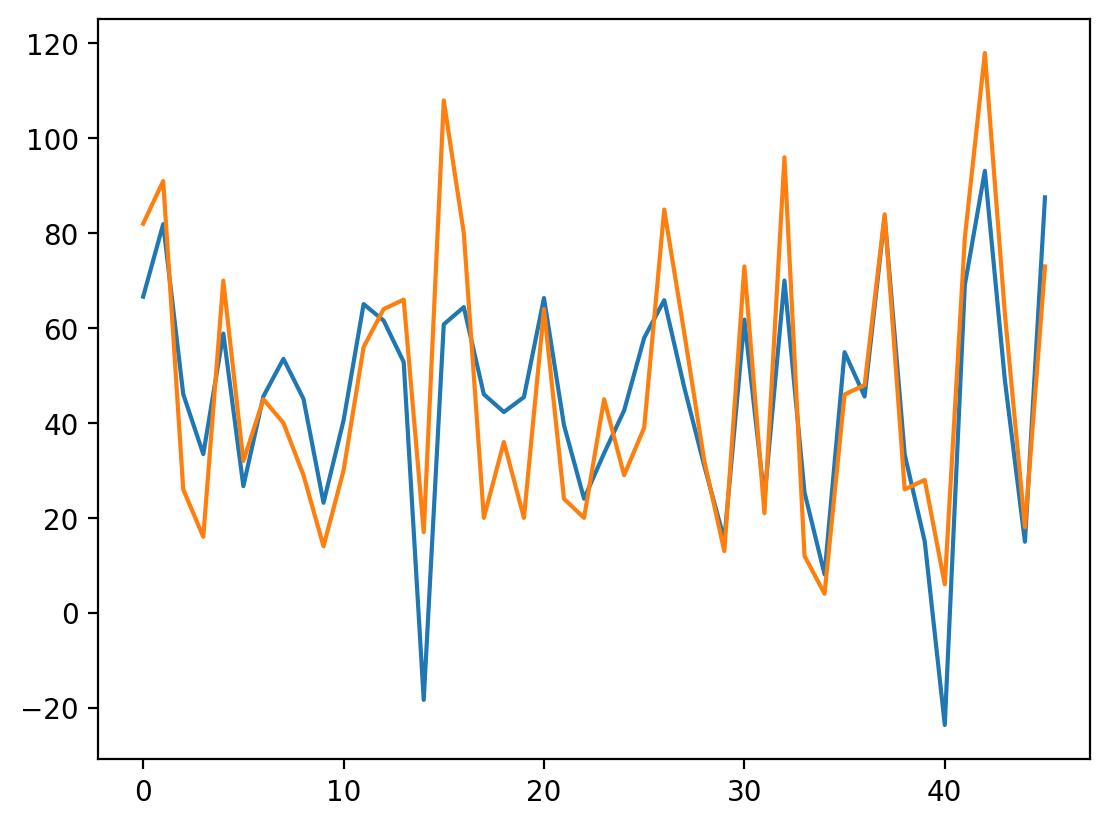

In [146]:
plt.plot(y_pred)
plt.plot(y_test.values)